<h1>Time series model</h1>
As we have historical data of sales, and to predict weekly sales in coming years, Prior sales information helps significantly. As we have previous year sales we can formulate this problem as a Time series model.

<h2>Individual model for each department</h2>
To make robust forecast, it is benefecial to develop separate model for each department.
Here, I have created time series model for Department 1 and Store 1.

In [1]:
import pandas as pd

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('D1S1.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
print (data.head())


            Unnamed: 0  Store  Dept  Weekly_Sales  IsHoliday  Year  Month  Day
Date                                                                          
2010-02-05           0      1     1      24924.50      False  2010      2    5
2010-02-12           1      1     1      46039.49       True  2010      2   12
2010-02-19           2      1     1      41595.55      False  2010      2   19
2010-02-26           3      1     1      19403.54      False  2010      2   26
2010-03-05           4      1     1      21827.90      False  2010      3    5


Use only prior sale information to make forecast. No other features are used to make prediction.

In [3]:
data = data['Weekly_Sales']


In [5]:
import matplotlib.pylab as plt
plt.plot(data)

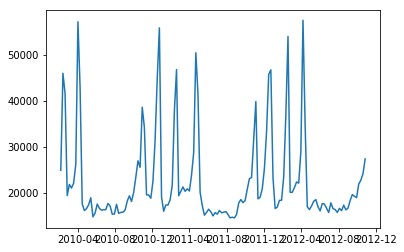

In [6]:
plt.show()

In [7]:
#Assumption of Time series model: SERIES should be STATIONARY.

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

Z:\Anaconda\Anaconda_setup_files\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Z:\Anaconda\Anaconda_setup_files\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys
Z:\Anaconda\Anaconda_setup_files\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


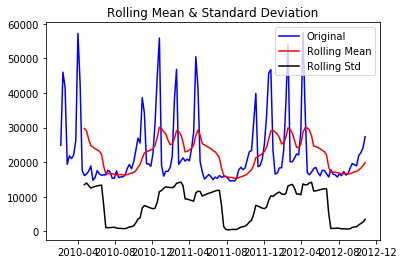

Results of Dickey-Fuller Test:
Test Statistic                  -2.522164
p-value                          0.110174
#Lags Used                       6.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64


In [8]:
#Check for stationarity

test_stationarity(data)


##After looking at graph, we can say that it is not statitonary series.

<h2>Decide on stationarity</h2>
IF test-statistic is smaller than critical value then series is stationary.
But here it is not stationary.

In [9]:
#making stationary series
import numpy as np
ts_log = np.log(data)
plt.plot(ts_log)
#plt.plot(data)


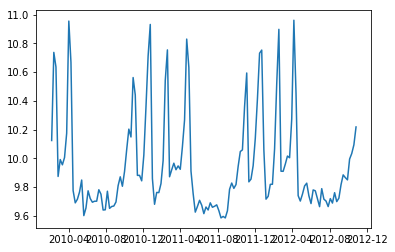

In [10]:
plt.show()

In [11]:
#detecting trend and removing them
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)

Z:\Anaconda\Anaconda_setup_files\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  


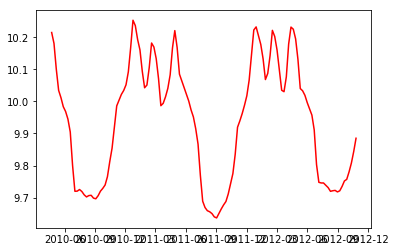

In [13]:
plt.plot(moving_avg, color='red')
plt.show()

In [14]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)


Date
2010-02-05        NaN
2010-02-12        NaN
2010-02-19        NaN
2010-02-26        NaN
2010-03-05        NaN
2010-03-12        NaN
2010-03-19        NaN
2010-03-26        NaN
2010-04-02        NaN
2010-04-09        NaN
2010-04-16        NaN
2010-04-23   -0.52586
Name: Weekly_Sales, dtype: float64

Z:\Anaconda\Anaconda_setup_files\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys
Z:\Anaconda\Anaconda_setup_files\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


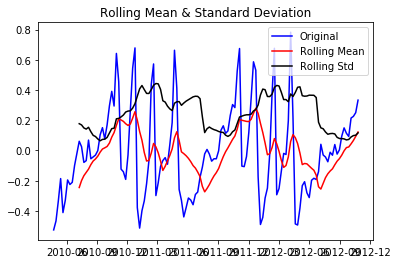

Results of Dickey-Fuller Test:
Test Statistic                  -3.343376
p-value                          0.013047
#Lags Used                      10.000000
Number of Observations Used    121.000000
Critical Value (1%)             -3.485585
Critical Value (5%)             -2.885739
Critical Value (10%)            -2.579676
dtype: float64


In [15]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

#by looking at test statistic value we can easily conclude that 
#NOW series is stationary

In [16]:
expwighted_avg = pd.ewma(ts_log, halflife=1)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')


Z:\Anaconda\Anaconda_setup_files\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=1,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


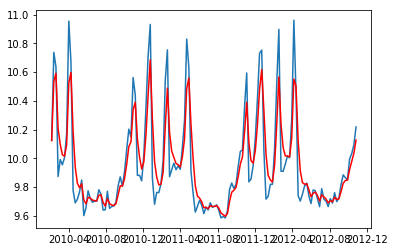

In [17]:
plt.show()

Z:\Anaconda\Anaconda_setup_files\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys
Z:\Anaconda\Anaconda_setup_files\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


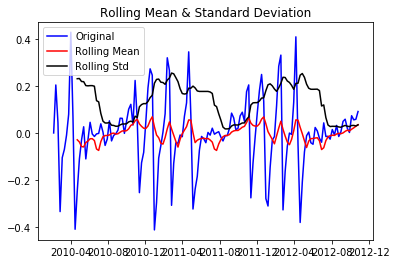

Results of Dickey-Fuller Test:
Test Statistic                  -4.924432
p-value                          0.000031
#Lags Used                       6.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64


In [18]:
#checking for stationarity
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)


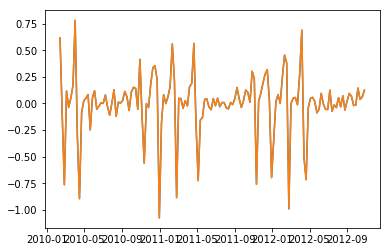

In [20]:
#differencing to remove trend and seasonality

ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

Z:\Anaconda\Anaconda_setup_files\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys
Z:\Anaconda\Anaconda_setup_files\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


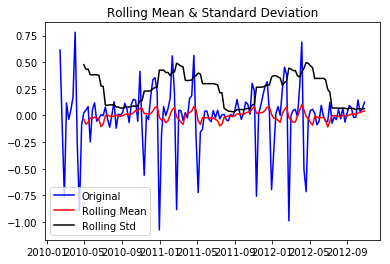

Results of Dickey-Fuller Test:
Test Statistic                -1.020495e+01
p-value                        5.837455e-18
#Lags Used                     5.000000e+00
Number of Observations Used    1.360000e+02
Critical Value (1%)           -3.479372e+00
Critical Value (5%)           -2.883037e+00
Critical Value (10%)          -2.578234e+00
dtype: float64


In [21]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

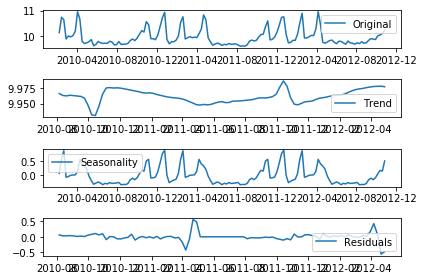

In [22]:
#Decomposing to remove trend and seasonality

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Z:\Anaconda\Anaconda_setup_files\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys
Z:\Anaconda\Anaconda_setup_files\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


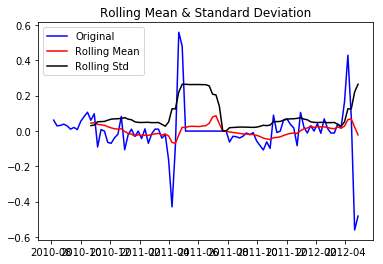

Results of Dickey-Fuller Test:
Test Statistic                -8.634322e+00
p-value                        5.644409e-14
#Lags Used                     1.000000e+00
Number of Observations Used    8.900000e+01
Critical Value (1%)           -3.506057e+00
Critical Value (5%)           -2.894607e+00
Critical Value (10%)          -2.584410e+00
dtype: float64


In [23]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

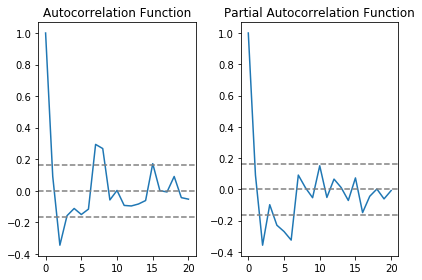

In [28]:
#forecasting
#ACF and PACF plots:
#TO decide parameters of time series
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

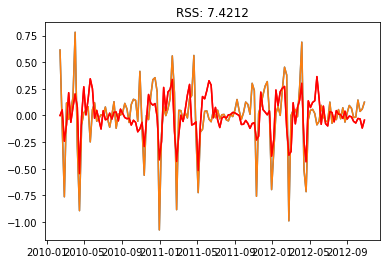

In [30]:
#ARIMA model based on differencing technique

from statsmodels.tsa.arima_model import ARIMA

#AR
model = ARIMA(ts_log, order=(10,1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
plt.show()

Z:\Anaconda\Anaconda_setup_files\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
Z:\Anaconda\Anaconda_setup_files\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
Z:\Anaconda\Anaconda_setup_files\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
Z:\Anaconda\Anaconda_setup_files\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


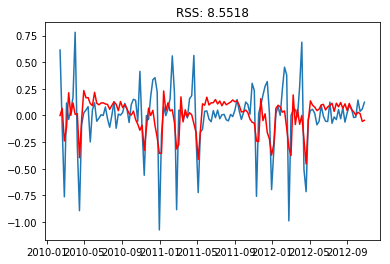

In [31]:
#MA

model = ARIMA(ts_log, order=(0, 1,4))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plt.show()

Z:\Anaconda\Anaconda_setup_files\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
Z:\Anaconda\Anaconda_setup_files\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


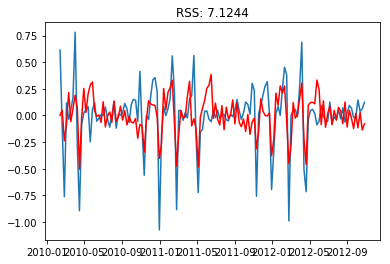

In [32]:
#Combining models (AR and MA)

model = ARIMA(ts_log, order=(10, 1, 4))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.show()

<h2>Predictions of same training set on department 1 and store 1</h2>
After creating ARIMA mdoel and predicitons, We need to scale back those predictions to original scale.

In [33]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print( predictions_ARIMA_diff.head())

Date
2010-02-12    0.000137
2010-02-19    0.048735
2010-02-26   -0.237525
2010-03-05   -0.076535
2010-03-12    0.216499
dtype: float64


In [34]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Date
2010-02-12    0.000137
2010-02-19    0.048872
2010-02-26   -0.188653
2010-03-05   -0.265188
2010-03-12   -0.048689
dtype: float64


In [35]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()


Z:\Anaconda\Anaconda_setup_files\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2010-02-05    10.123607
2010-02-12    10.123743
2010-02-19    10.172478
2010-02-26     9.934953
2010-03-05     9.858419
dtype: float64

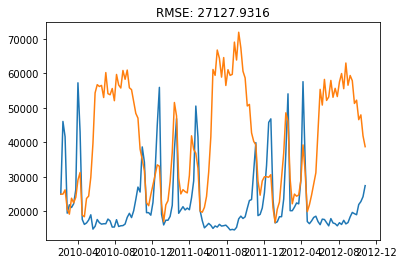

In [36]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data)**2)/len(data)))
plt.show()

<h2>Further approach</h2>
1. In ARIMA, I have used differencing technique to remove trend and seasonality. It is not giving robust results. So we can use different technique like STL decompsotion to improve results.
2. Currently this model uses only department 1 and store 1 data. So We have to create this type of model for all possible combinations of department and stores. (by automating above procedure with automated tuning of ARIMA model)
3. We can use other time series models.